## Problem Statement - Part I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

- The company wants to know:

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

#### Business Goal 


We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


#### Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

### 1. Reading and Understanding the Data

In [4]:
# Reading the dataset
house_df = pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Dimenstion of dataset
print(house_df.shape)

# info about dataset
print(house_df.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [9]:
# Checking null values 
house_df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

As we can see, we have some of null values available in the dataset.

In [10]:
# describing the statistical Summary of the DS
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2. Data Cleaning

In [11]:
# Checking entire row and column Null values if any
# Row
print("Entire Row Null values -")
house_df.isnull().all(axis=1).sum()

Entire Row Null values -


0

In [12]:
# Column
print("Entire Column Null values -")
house_df.isnull().all(axis=0).sum()

Entire Column Null values -


0

So, there is no entire-row or entire-column null values.


#### Checking for the null values having count > 0 on each column 

In [13]:
house_df.isnull().sum()[ (house_df.isnull().sum() > 0) ]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Null value percentages which are greater than 0

In [14]:
round(100 * house_df.isnull().sum()[ 
    (house_df.isnull().sum() > 0 )] / len(house_df), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [15]:
for column in house_df.columns:
    print(column+" "+str(house_df[column].isnull().sum()))

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [16]:
# checking which columns are having more than 70% null Values
for column in house_df.columns:
    if round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)), 2) > 70:
        print(column +" " + str(round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)), 2)))

Alley 93.77
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


### 3. Data Preparation

#### Removing NULL values

In [18]:
# Eliminating the Columns having more than 70% NULL values
house_df = house_df.drop(house_df.loc[:,list(round(100 * (house_df.isnull().sum()/len(house_df.index)),2) > 70)].columns,1)

In [19]:
# Now checking which columns are having how much % of Null values
for column in house_df.columns:
    #if round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)), 2) > 70:  
        print(column +" " + str(round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)), 2)))

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 17.74
LotArea 0.0
Street 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.55
MasVnrArea 0.55
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 2.53
BsmtCond 2.53
BsmtExposure 2.6
BsmtFinType1 2.53
BsmtFinSF1 0.0
BsmtFinType2 2.6
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.07
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
FireplaceQu 47.26
GarageType 5.55
GarageYrBlt 5.55
GarageFinish 5.55
GarageCars 0.0
GarageArea 0.0
GarageQual 5.55
GarageCond 5.55
PavedDrive 0.0
WoodDeckSF 0.0
OpenPorch

#### Observation :

As we can see, `FireplaceQu` has highest % of Null values i.e. `47.26%`. Hence we will now go through some of the columns having highest Null values as per their %. 

#### 1. FireplaceQu

In [20]:
# Starting from the columns having highest % of NULL values
house_df["FireplaceQu"].describe()  #To describe the statistical summary of the column

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

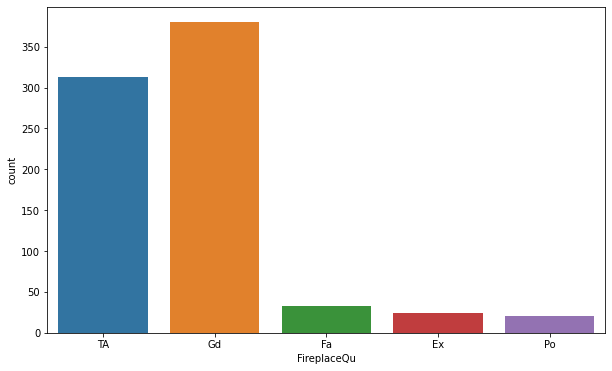

In [21]:
# plotting the column detail
plt.figure(figsize=(10,6))
sns.countplot(house_df["FireplaceQu"])

Here, `Good(Gd)` and `Average(TA)` are the top values but to decide on either of the values would be difficult. Hence we have to add another class or category as `"unknown"` and replace with `"Unknown"`.

In [22]:
# Replacing with "Unknown"
house_df["FireplaceQu"]= house_df["FireplaceQu"].fillna("Unknown")

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

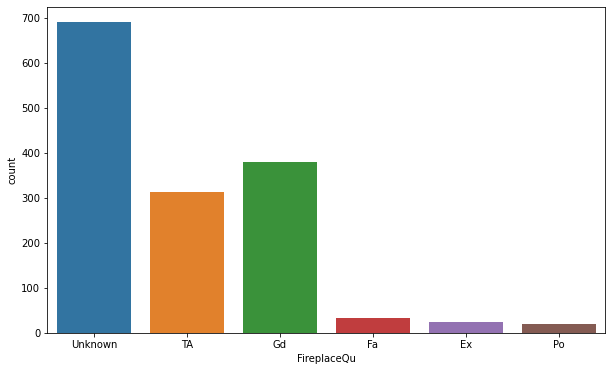

In [23]:
#plotting the FireplaceQu column again to see the changes
plt.figure(figsize=(10,6))
sns.countplot(house_df["FireplaceQu"])

Now we have `LotFrontage` column having `17.74%` of NULL values

#### 2. LotFrontage 

In [24]:
#describing the statistical summary of the column
house_df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

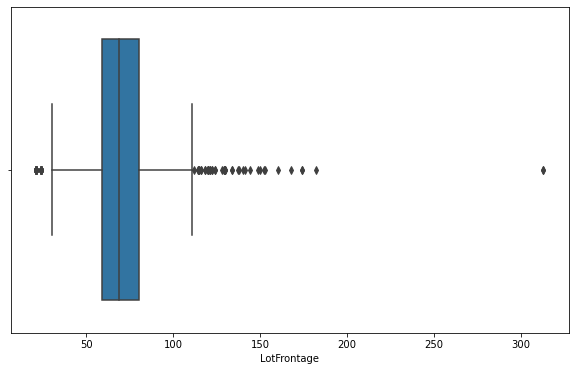

In [29]:
#Now plotting the column
plt.figure(figsize=(10,6))
sns.boxplot(house_df["LotFrontage"])

In [30]:
#checking the mean of the column
house_df["LotFrontage"].mean()

70.04995836802665

In [31]:
# Now filling the NULL values with the above Mean value
house_df["LotFrontage"] = house_df["LotFrontage"].replace(np.NaN, house_df["LotFrontage"].mean())

(array([  20,   25,   35,   36,   41,   52,   85,   86,   88,  109,  150,
        151,  159,  161,  171,  197,  224,  231,  260,  276,  277,  278,
        290,  302,  306,  313,  320,  355,  367,  377,  408,  429,  440,
        446,  473,  477,  492,  523,  662,  665,  673,  691,  774,  798,
        803,  807,  825,  854,  889,  906,  909,  918,  934,  963,  966,
        991, 1010, 1031, 1051, 1055, 1061, 1106, 1107, 1109, 1127, 1151,
       1162, 1168, 1169, 1173, 1182, 1186, 1211, 1243, 1273, 1298, 1305,
       1313, 1322, 1337, 1339, 1355, 1359, 1361], dtype=int64),)


In [34]:
#Here we have outliers as per the boxplot above, which we need to remove
house_df["LotFrontage"].describe(percentiles = [.05, .25, .5, .75, .90, .95, .99]) #checking the outliers

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
5%         35.950000
25%        60.000000
50%        70.049958
75%        79.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64

In [35]:
# Capping the values to the 95th quantile
percentile_95 = house_df["LotFrontage"].quantile([.05, .95]).values

In [36]:
percentile_95 #Now this is the range of our values

array([ 35.95, 104.  ])

In [38]:
#Now assigning all the values below and above the 35.95 and 104.00 respectively, which are Outliers
house_df["LotFrontage"][house_df["LotFrontage"] <= percentile_95[0]]  = percentile_95[0]
house_df["LotFrontage"][house_df["LotFrontage"] >= percentile_95[1]]  = percentile_95[1]

<AxesSubplot:xlabel='LotFrontage'>

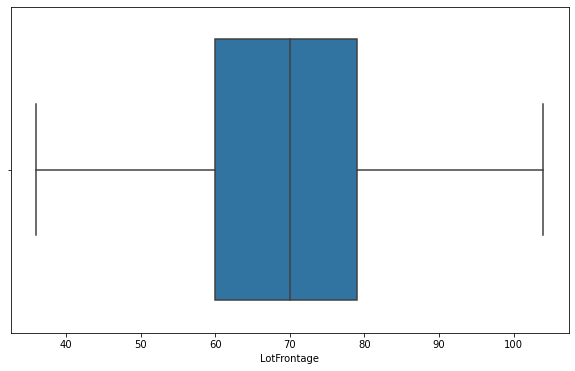

In [39]:
# Now plotting the LotFrontsage column to see the change
plt.figure(figsize=(10,6))
sns.boxplot(house_df["LotFrontage"])

Now we need to check the Columns having NULL value % as `5.55%`.

#### 3. GarageType, GarageFinish, GarageQual, GarageCond

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

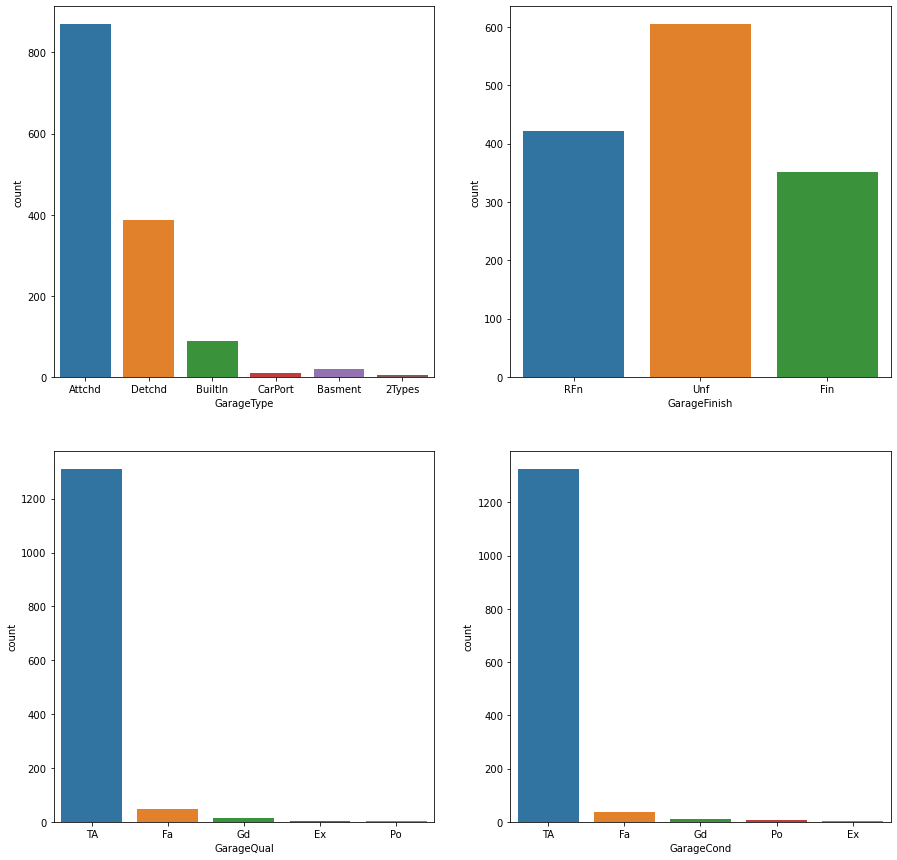

In [40]:
#plotting the 4 above columns
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(house_df["GarageType"])
plt.subplot(2,2,2)
sns.countplot(house_df["GarageFinish"])
plt.subplot(2,2,3)
sns.countplot(house_df["GarageQual"])
plt.subplot(2,2,4)
sns.countplot(house_df["GarageCond"])

#### Observation:

1. GarageType - Most values are of type "Attchd" i.e. "Attached to home", so we replace NULL values with "Attchd" 
2. GarageFinish - Most values are of type "Unf" i.e. "Unfinished", so we replace NULL values with "Unf"
3. GarageQual - Most values are of type "TA" i.e. "Typical/Average", so we replace NULL values with "TA"
4. GarageCond - Most values are of type "TA" i.e. "Typical/Average", so we replace NULL values with "TA"

In [41]:
house_df["GarageType"] = house_df["GarageType"].fillna("Attchd")
house_df["GarageFinish"] = house_df["GarageFinish"].fillna("Unf")
house_df["GarageQual"] = house_df["GarageQual"].fillna("TA")
house_df["GarageCond"] = house_df["GarageCond"].fillna("TA")

#### 4. GarageYrBlt

In [43]:
house_df["GarageYrBlt"].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

Here we see, mostly the garages were built in the year 2005 as per above count check. So, replacing NULL values with `2005`. 

In [44]:
# Replacing Null values with 2005
house_df["GarageYrBlt"] = house_df["GarageYrBlt"].replace(np.NaN,2005)

- Now we will see Columns which are having approx. 2.53% of Null Values(BsmtExposure has 2.6%)

#### 5.  BsmtQual,  BsmtCond,  BsmtExposure,  BsmtFinType1,  BsmtFinType2 

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

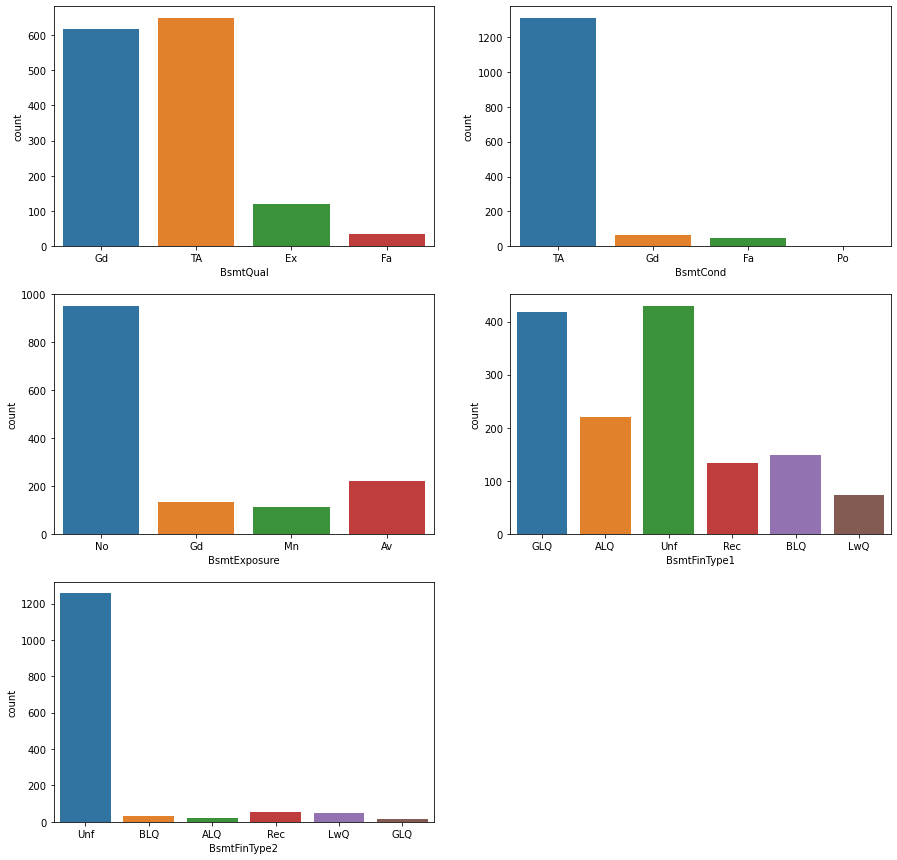

In [45]:
# plotting BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtType2
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.countplot(house_df["BsmtQual"])
plt.subplot(3,2,2)
sns.countplot(house_df["BsmtCond"])
plt.subplot(3,2,3)
sns.countplot(house_df["BsmtExposure"])
plt.subplot(3,2,4)
sns.countplot(house_df["BsmtFinType1"])
plt.subplot(3,2,5)
sns.countplot(house_df["BsmtFinType2"])

#### Observation:

1. BsmtQual - Most values are of type "TA", so we replace NULL values with "TA" 
2. BsmtCond - Most values are of type "TA", so we replace NULL values with "TA"
3. BsmtExposure - Most values are of type "No", so we replace NULL values with "No"
4. BsmtFinType1 - Most values are of type "Unf", so we replace NULL values with "Unf"
5. BsmtFinType2 - Most values are of type "Unf", so we replace NULL values with "Unf"

In [47]:
house_df["BsmtQual"] = house_df["BsmtQual"].fillna("TA")
house_df["BsmtCond"] = house_df["BsmtCond"].fillna("TA")
house_df["BsmtExposure"] = house_df["BsmtExposure"].fillna("No")
house_df["BsmtFinType1"] = house_df["BsmtFinType1"].fillna("Unf")
house_df["BsmtFinType2"] = house_df["BsmtFinType2"].fillna("Unf")

- Then we have columns which are having 0.55% NULL values , i.e. MasVnrType and MasVnrArea

#### 6.  MasVnrType and MasVnrArea

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

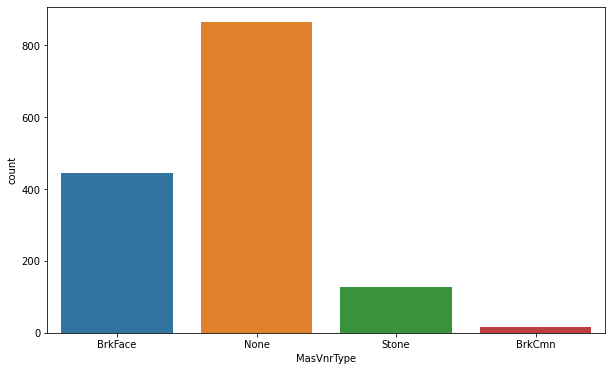

In [50]:
# Now plotting MasVnrType
plt.figure(figsize=(10,6))
sns.countplot(house_df["MasVnrType"])

In [51]:
# In the above plot, most values are of type "None", so we replace NULL values with "None"
house_df["MasVnrType"] = house_df["MasVnrType"].fillna("None")

In [53]:
# checking NULL value counts for MasVnrArea
house_df["MasVnrArea"].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [54]:
# In the above plot, most values are of type "0.0". Hence we replace NULL values with "0.0"
house_df["MasVnrArea"] = house_df["MasVnrArea"].fillna("0.0")

Now we check for Electrical column which has "0.05%" NULL values

#### 7. Electrical 

<AxesSubplot:xlabel='Electrical', ylabel='count'>

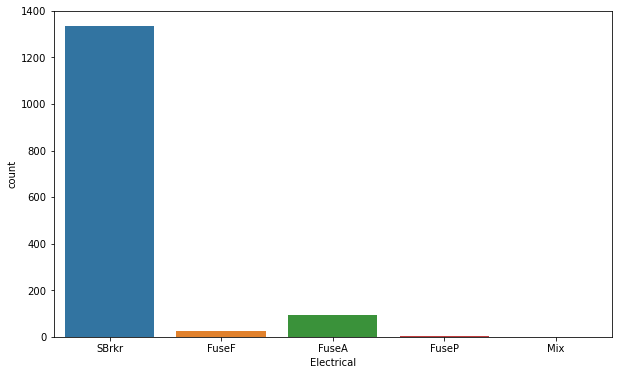

In [55]:
# Plotting the column details with count plot
plt.figure(figsize=(10,6))
sns.countplot(house_df["Electrical"])

In [56]:
# In above plot, most values are of type "SBrkr", hence we replace NULL values with "SBrkr"
house_df["Electrical"] = house_df["Electrical"].fillna("SBrkr")

In [58]:
# Checking NULL values now
for column in house_df.columns:
    print(column+" "+ str(round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)) ,2)))

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 0.0
LotArea 0.0
Street 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.0
MasVnrArea 0.0
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 0.0
BsmtCond 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
BsmtFinSF1 0.0
BsmtFinType2 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
FireplaceQu 0.0
GarageType 0.0
GarageYrBlt 0.0
GarageFinish 0.0
GarageCars 0.0
GarageArea 0.0
GarageQual 0.0
GarageCond 0.0
PavedDrive 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
Enclosed

In [64]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

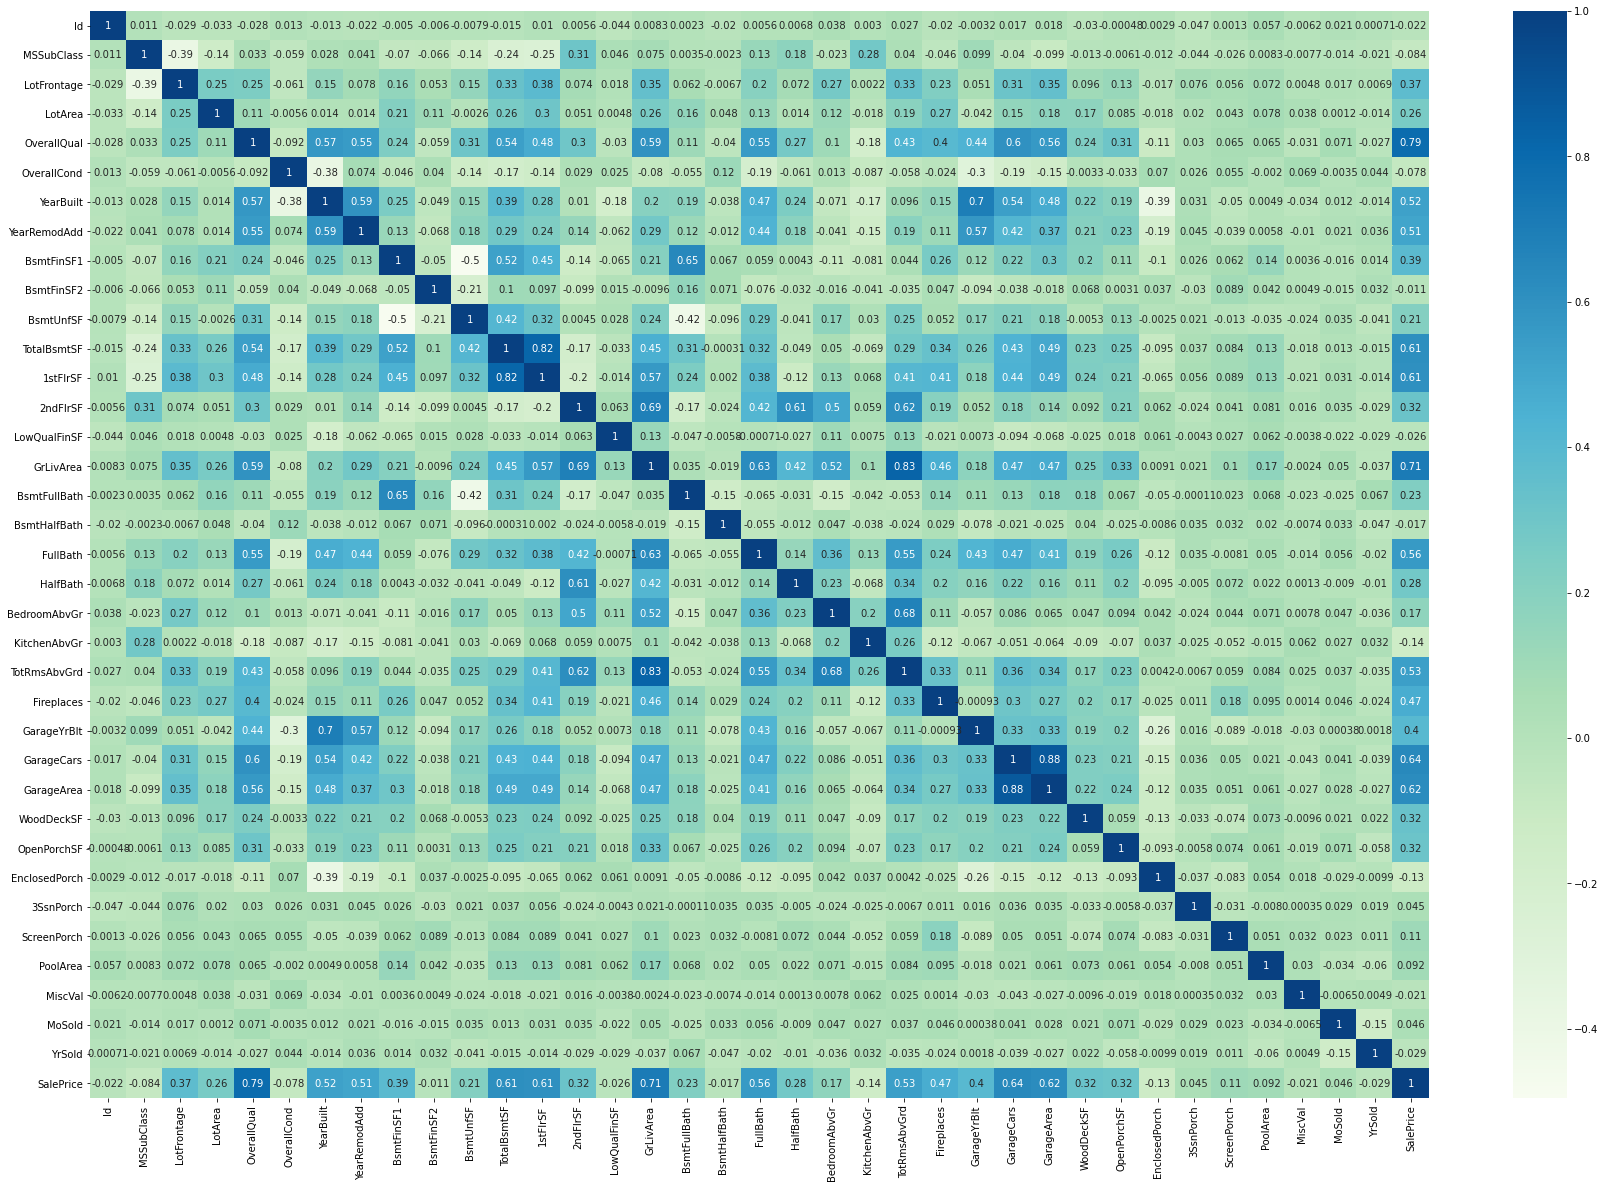

In [70]:
# plotting Heatmap to see the correlations
plt.figure(figsize=(30,20))
house_corr = house_df.corr()
sns.heatmap(house_corr, cmap="GnBu", annot=True)

#### Observations

Corelation of price with independent variables:
- Price is `highly(positively)` corelated with `overall material quality and finish , ground living area, garage size(i.t.o Car capacity), garage area(in sq. ft.), total basement area(in sq. ft), first floor area(sq. ft.), num of bathrooms, total rooms and year built`. Also, there are some features people do consider while purchasing a house.

- Price is `negatively` corelated with `enclosed porch area (sq feet), type of dwelling, overall condition of the house` and some more factors.

Corelation among Independent variables: 
- Some independent variables have high corelation namely `1stfloor area` and `bsmt area`, `garage area` (in terms of sq feet and cars), `total rooms and living area` etc
- Some independent variables have negative corelation namely `unfinished and finished basement area`, `bsmt full bathrooms` and `unfinished bsmt area` etc

* Care needs to be taken while building the model for this data set as multi-colinearity can cause problems.

<AxesSubplot:>

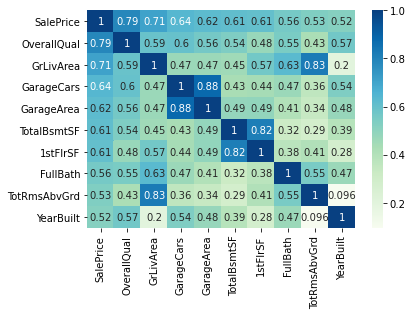

In [71]:
#Those are a lot of variables, so performing EDA would be difficult. So, choosing the top 10 corelated features to the price

#Top 10 heatmap
top_10_cols = house_corr.nlargest(10, 'SalePrice')['SalePrice'].index

top_10_cm = np.corrcoef(house_df[top_10_cols].values.T)
sns.heatmap(top_10_cm, cmap="GnBu", annot=True, yticklabels=top_10_cols.values, xticklabels=top_10_cols.values)

#### Outliers checking

In [75]:
# checking for any outliers

house_numeric_vars_1 = house_df[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]]
house_numeric_vars_2 = house_df[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]]
house_numeric_vars_3 = house_df[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]]

In [79]:
# print(house_numeric_vars_1.describe(percentiles=[.25,.5,.75,.90,.95,.99]))
# print(house_numeric_vars_2.describe(percentiles=[.25,.5,.75,.90,.95,.99]))
print(house_numeric_vars_3.describe(percentiles=[.25,.5,.75,.90,.95,.99]))

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460

In [80]:
# Capping 
house_numeric_vars_to_cap = house_df[['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']]
type(house_numeric_vars_to_cap)

pandas.core.frame.DataFrame

In [85]:
house_df[column] = house_df[column].astype(float)

In [87]:
# We will cap the values of the columns having outliers to the 95th percentile
for column in house_numeric_vars_to_cap.columns:
    percentile_95 = house_df[column].quantile([.05, .95]).values
    
    house_df[column][house_df[column] <= percentile_95[0]] = percentile_95[0]
    house_df[column][house_df[column] >= percentile_95[1]] = percentile_95[1]

#### Changing Yes/No type variable values to 1/0

In [88]:
house_df["CentralAir"] = house_df["CentralAir"].map({'Y' : 1, 'N' : 0})

### 4. Univariate and Bi-variate Analysis of Top 10 Features


#### OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

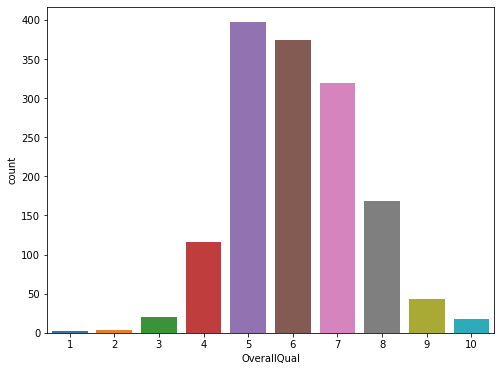

In [90]:
# plotting "OverallQual"
plt.figure(figsize=(8,6))
sns.countplot(house_df["OverallQual"])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

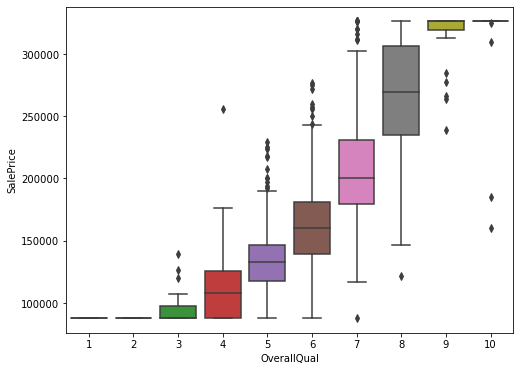

In [91]:
# plotting "OverallQual" with "SalePrice"
plt.figure(figsize=(8,6))
sns.boxplot(x="OverallQual", y="SalePrice", data = house_df)

**Observations**

- Most of the houses have Overall quality as 5, 6 and 7
- People pay more for higher quality homes


#### GrLivArea

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

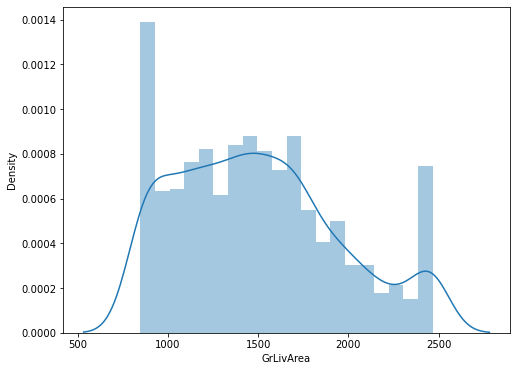

In [93]:
# plotting "GrLivArea"
plt.figure(figsize=(8,6))
sns.distplot(house_df["GrLivArea"],bins=20)

<Figure size 576x432 with 0 Axes>

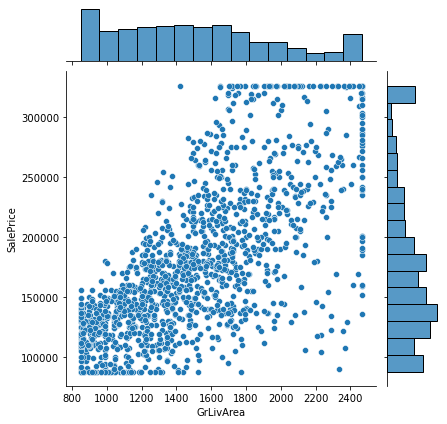

In [96]:
# plotting "GrLivArea" with "SalePrice"
plt.figure(figsize=(8,6))
sns.jointplot(x=house_df["GrLivArea"], y=house_df["SalePrice"])

**Observations**

- Most of the houses have ground living area of roughly 760-780 sq feet and second most being around 1525 sq feet
- There is mostly linear relationship between the living area and price which is expected (with some exceptions)


#### GarageCars

<AxesSubplot:xlabel='GarageCars'>

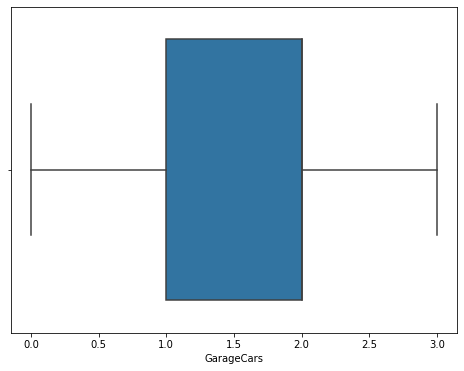

In [102]:
# plotting "GarageCars"
plt.figure(figsize=(8,6))
sns.boxplot(house_df["GarageCars"])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

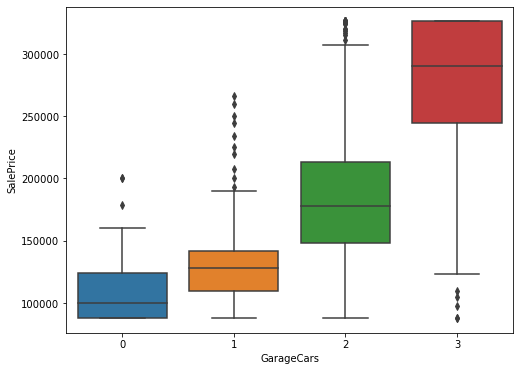

In [101]:
# plotting "GarageCars" with "SalePrice"
plt.figure(figsize=(8,6))
sns.boxplot(x="GarageCars",y="SalePrice",data=house_df)

**Observations**

- Most of the houses have the capacity to store 1-2 cars
- Houses having higher car storage capacity have higher prices


#### GarageArea

<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

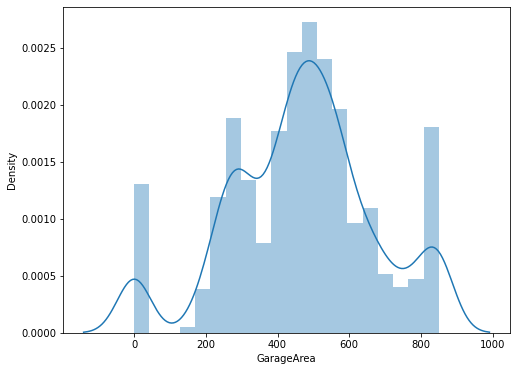

In [104]:
# plotting "GarageArea"
plt.figure(figsize=(8,6))
sns.distplot(house_df["GarageArea"],bins=20)

<Figure size 576x432 with 0 Axes>

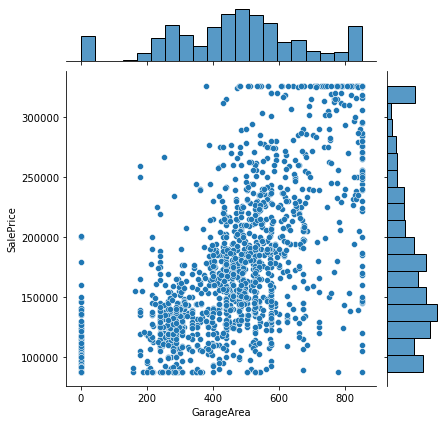

In [105]:
# plotting "GarageArea" with "SalePrice"
plt.figure(figsize=(8,6))
sns.jointplot(x=house_df["GarageArea"],y=house_df["SalePrice"])

**Observations**

- Most of the houses have a garage area of roughly 500 sq feet
- There is mostly a linear relationship between the garage area and price


#### TotalBsmtSF

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

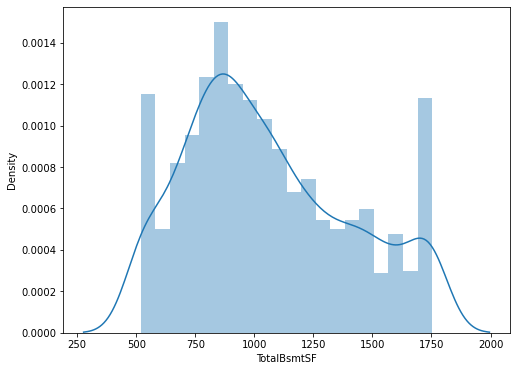

In [106]:
# plotting "TotalBsmtSF"
plt.figure(figsize=(8,6))
sns.distplot(house_df["TotalBsmtSF"],bins=20)

<Figure size 576x432 with 0 Axes>

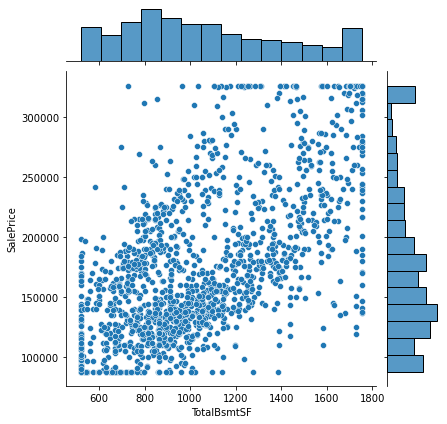

In [107]:
# plotting "TotalBsmtSF" with "SalePrice"
plt.figure(figsize=(8,6))
sns.jointplot(x=house_df["TotalBsmtSF"],y=house_df["SalePrice"])

**Observations**

- Most of the houses have basement area in range 875-1000 sq feet
- There is mostly a linear relationship between the basement area and price with few exceptions



#### 1stFlrSF

<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

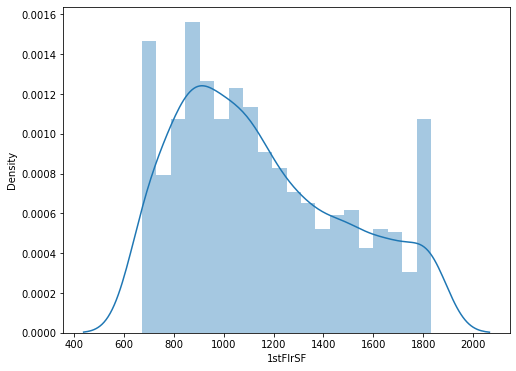

In [108]:
# plotting "1stFlrSF"
plt.figure(figsize=(8,6))
sns.distplot(house_df["1stFlrSF"],bins=20)

<Figure size 576x432 with 0 Axes>

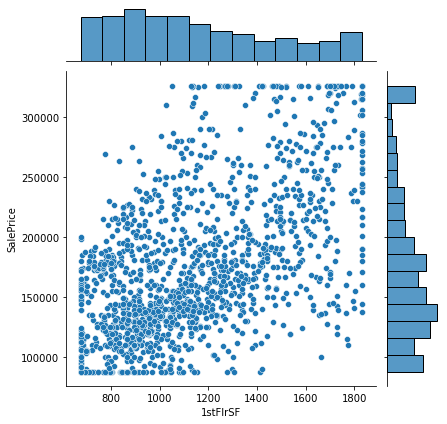

In [109]:
# plotting "1stFlrSF" with "SalePrice"
plt.figure(figsize=(8,6))
sns.jointplot(x=house_df["1stFlrSF"],y=house_df["SalePrice"])

**Observations**

- Most of the houses have 1st floor area in range roughly 875-1000 sq feet
- There is mostly a linear relationship between the 1st floor area and price with few exceptions


#### FullBath

<AxesSubplot:xlabel='FullBath', ylabel='count'>

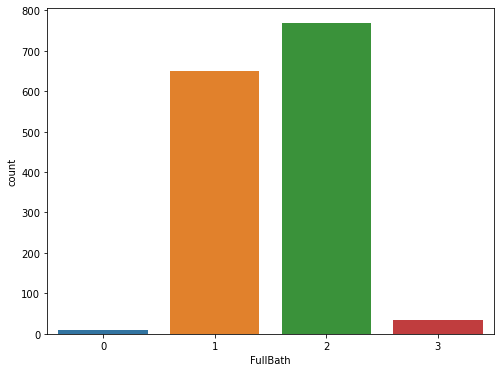

In [110]:
# plotting "FullBath"
plt.figure(figsize=(8,6))
sns.countplot(house_df["FullBath"])

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

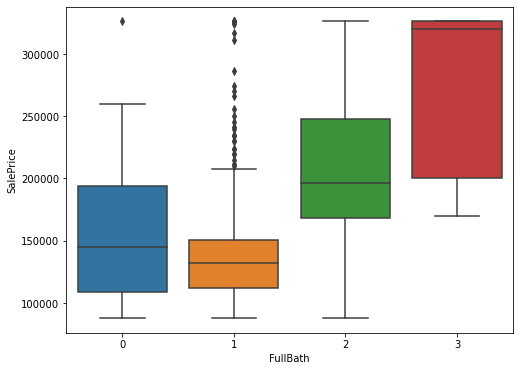

In [111]:
# plotting "FullBath" with "SalePrice"
plt.figure(figsize=(8,6))
sns.boxplot(x="FullBath",y="SalePrice",data=house_df)

**Observations**

- Most of the houses have 2 or 1 bathrooms
- The price increases as the num of bathrooms increase, with few exceptions



#### TotRmsAbvGrd

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

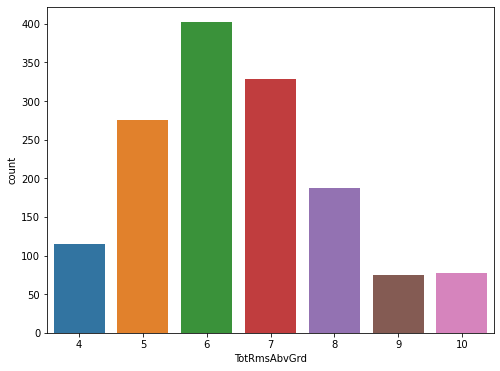

In [112]:
# plotting "TotRmsAbvGrd"
plt.figure(figsize=(8,6))
sns.countplot(house_df["TotRmsAbvGrd"])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

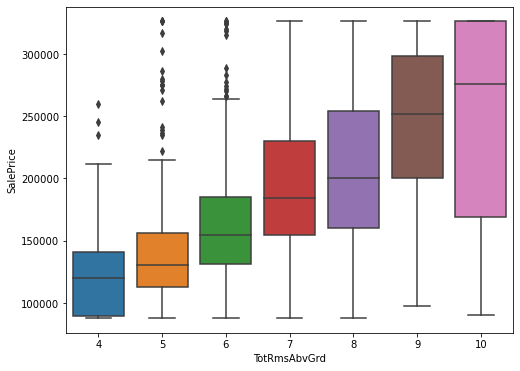

In [113]:
# plotting "TotRmsAbvGrd" with "SalePrice"
plt.figure(figsize=(8,6))
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=house_df)

**Observations**

- Most of the houses have6 or 7 rooms
- The price increases as the number of rooms increase with few exceptions



#### YearBuilt

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

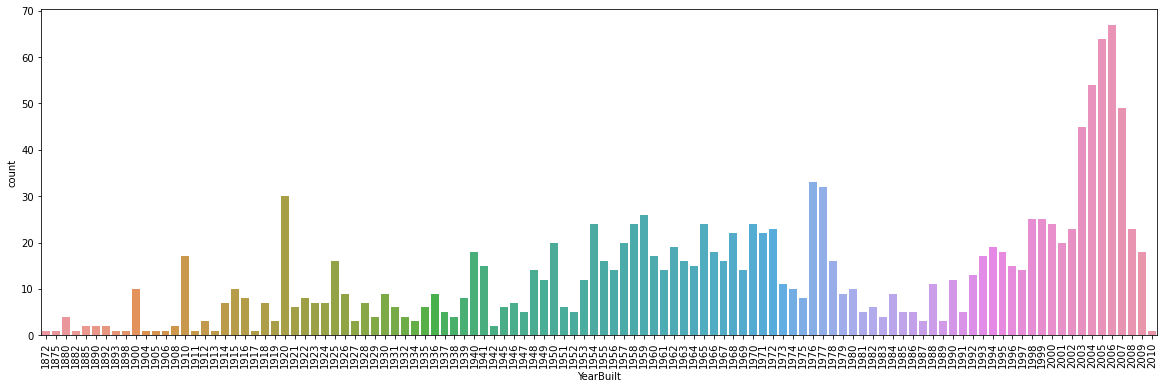

In [116]:
#Plotting "YearBuilt"
plt.figure(figsize=(20,6))
sns.countplot(house_df["YearBuilt"])
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

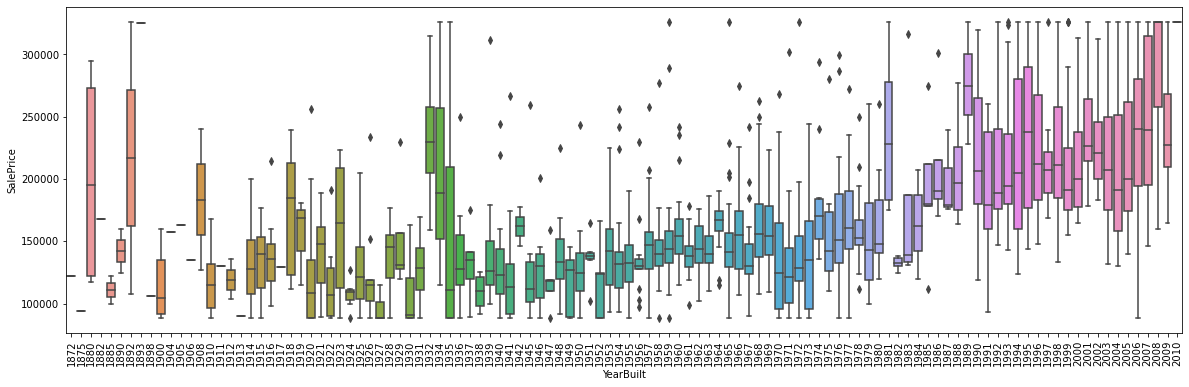

In [117]:
#Plotting "YearBuilt" with "SalePrice"
plt.figure(figsize=(20,6))
sns.boxplot(x="YearBuilt",y="SalePrice",data=house_df)
plt.xticks(rotation=90)

**Observations**

- Most of the houses have been constructed recently
- There is no constant pattern between the price and year. Causes for this can be inflation/depression in the economy in a certain year



### 5. Dummy variable creation

In [118]:
house_categorical_vars_to_dummy = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                                   'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1','Condition2','BldgType',
                                   'HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st',
                                   'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                                   'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                                   'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
                                   'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [119]:
for column in house_categorical_vars_to_dummy:
    #Creation of dummy variables and dropping the first one
    dummy_df = pd.get_dummies(house_df[column], prefix= column, drop_first = True)
    
    #Adding the results to the master dataframe
    house_df = pd.concat([house_df, dummy_df], axis=1)

In [120]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0


In [122]:
#Dropping the original categorical columns 
for column in house_categorical_vars_to_dummy:
    house_df = house_df.drop(column, 1)

In [123]:
house_df.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450.0,2003,2003,196.0,706,0.0,150,856.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600.0,1976,1976,0.0,978,0.0,284,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250.0,2001,2002,162.0,486,0.0,434,920.0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550.0,1915,1970,0.0,216,0.0,540,756.0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260.0,2000,2000,350.0,655,0.0,490,1145.0,...,0,0,0,0,1,0,0,0,1,0


In [125]:
house_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)

### 6. Feature Standardisation

In [126]:
#initializing 
standard_scaler = StandardScaler()

In [128]:
house_df[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]] = standard_scaler.fit_transform(house_df[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]])
house_df[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]] = standard_scaler.fit_transform(house_df[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]])
house_df[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]] = standard_scaler.fit_transform(house_df[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]])

In [129]:
house_df.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.260425,-0.355359,1.050994,0.878668,0.739648,0.667140,-0.327561,-0.980932,-0.576587,...,0,0,0,0,1,0,0,0,1,0
1,2,0.648283,-0.023780,0.156734,-0.429577,-0.654947,1.327216,-0.327561,-0.657604,0.594174,...,0,0,0,0,1,0,0,0,1,0
2,3,-0.078684,0.451963,0.984752,0.830215,0.497729,0.133255,-0.327561,-0.295670,-0.392034,...,0,0,0,0,1,0,0,0,1,0
3,4,-0.563328,-0.038197,-1.863632,-0.720298,-0.654947,-0.521967,-0.327561,-0.039904,-0.864952,...,0,0,0,0,1,0,0,0,0,0
4,5,0.890605,1.319834,0.951632,0.733308,1.835402,0.543376,-0.327561,-0.160548,0.256787,...,0,0,0,0,1,0,0,0,1,0


In [131]:
house_df.shape

(1460, 267)

### 7. Model Building


#### Train Test Split

In [132]:
# Independent Variables
X = house_df.drop(['Id', 'SalePrice'], axis=1)

#Dependent Variable
y = house_df['SalePrice']

y.head()

0    0.482420
1    0.064079
2    0.714833
3   -0.578928
4    1.125427
Name: SalePrice, dtype: float64

In [133]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.260425,-0.355359,1.050994,0.878668,0.739648,0.667140,-0.327561,-0.980932,-0.576587,-0.886955,...,0,0,0,0,1,0,0,0,1,0
1,0.648283,-0.023780,0.156734,-0.429577,-0.654947,1.327216,-0.327561,-0.657604,0.594174,0.330182,...,0,0,0,0,1,0,0,0,1,0
2,-0.078684,0.451963,0.984752,0.830215,0.497729,0.133255,-0.327561,-0.295670,-0.392034,-0.695091,...,0,0,0,0,1,0,0,0,1,0
3,-0.563328,-0.038197,-1.863632,-0.720298,-0.654947,-0.521967,-0.327561,-0.039904,-0.864952,-0.572178,...,0,0,0,0,1,0,0,0,0,0
4,0.890605,1.319834,0.951632,0.733308,1.835402,0.543376,-0.327561,-0.160548,0.256787,-0.020570,...,0,0,0,0,1,0,0,0,1,0


In [134]:
# Splitting the data into train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size=0.3, random_state= 100)

In [135]:
X_train.shape

(1021, 265)

In [136]:
X_test.shape

(438, 265)

In [137]:
#adding the constants
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

#### First Training model Linear Regression

In [138]:
logis_reg_model_1 = sm.OLS(y_train, X_train_sm, family = sm.families.Binomial())
#fitting the residuals
res = logis_reg_model_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     76.04
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        06:57:25   Log-Likelihood:                 200.89
No. Observations:                1021   AIC:                             98.22
Df Residuals:                     771   BIC:                             1330.
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.5085      0.627     -5.594      0.000      -4.740      -2.277
LotFrontage               0.0085      0.012      0.686      0.493      -0.016       0.033
LotArea                   0.0713      0.015      4.717      0.000       0.042       0.101
YearBuilt                 0.1753      0.033      5.273      0.000       0.110       0.241
YearRemodAdd              0.0554      0.015      3.793      0.000       0.027       0.084
MasVnrArea                0.0194      0.015      1.276      0.202      -0.010       0.049
BsmtFinSF1                0.0274      0.032      0.846      0.398      -0.036       0.091
BsmtFinSF2                0.0030      0.022      0.133      0.894      -0.041       0.047
BsmtUnfSF                -0.0411      0.031     -1.314      0.189      -0.103       0.020
TotalBsmtSF               0.1815      0.036      5.074      0.000       0.111       0.252
1stFlrSF                 -0.0286      0.039     -0.731      0.465      -0.105       0.048
2ndFlrSF                  0.0833      0.045      1.835      0.067      -0.006       0.172
LowQualFinSF          -2.476e-15   1.92e-15     -1.286      0.199   -6.25e-15     1.3e-15
GrLivArea                 0.3363      0.046      7.310      0.000       0.246       0.427
BsmtFullBath              0.0182      0.012      1.508      0.132      -0.006       0.042
BsmtHalfBath             -0.0160      0.009     -1.777      0.076      -0.034       0.002
FullBath                  0.0100      0.015      0.674      0.501      -0.019       0.039
HalfBath                 -0.0198      0.027     -0.723      0.470      -0.074       0.034
BedroomAbvGr             -0.0199      0.014     -1.455      0.146      -0.047       0.007
KitchenAbvGr          -3.192e-15   1.92e-15     -1.667      0.096   -6.95e-15    5.67e-16
TotRmsAbvGrd             -0.0109      0.019     -0.579      0.563      -0.048       0.026
Fireplaces               -0.0012      0.022     -0.053      0.958      -0.045       0.042
GarageYrBlt               0.0018      0.015      0.120      0.905      -0.028       0.032
GarageCars               -0.0088      0.024     -0.375      0.708      -0.055       0.037
GarageArea                0.0900      0.024      3.815      0.000       0.044       0.136
WoodDeckSF                0.0247      0.009      2.698      0.007       0.007       0.043
OpenPorchSF               0.0134      0.010      1.383      0.167      -0.006       0.032
EnclosedPorch             0.0040      0.010      0.412      0.680      -0.015       0.023
3SsnPorch             -1.163e-14    4.5e-15     -2.586      0.010   -2.05e-14    -2.8e-15
ScreenPorch           -1.626e-05      0.008     -0.002      0.998      -0.017       0.016
PoolArea               2.023e-14    2.1e-15      9.622      0.000    1.61e-14    2.44e-14
MiscVal                

#### Making Predictions 

In [139]:
y_train_pred = res.predict(X_train_sm)
y_test_pred = res.predict(X_test_sm)

Text(0.5, 0, 'Errors ')

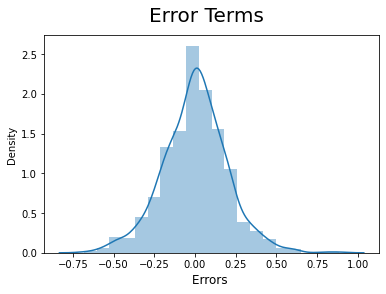

In [142]:
# Calculating Residuals
residual = y_train - y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                          # Plot heading , (suptitle - subplot title)
plt.xlabel('Errors ', fontsize= 12)                                 # X-label

**Observations**

The error terms seem to be normalized and model r2 score is also very good.

Text(0, 0.5, 'y_pred')

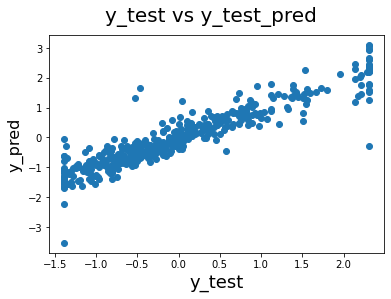

In [143]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

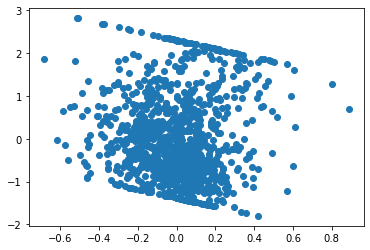

In [144]:
# checking non-linearity in data by plotting residuals vs predictors
plt.scatter(y_train - y_train_pred, y_train_pred)

**Observations**


- The residuals should be scattered randomly around 0 - `No`
- The spread of residuals remains constant - `No`
- There are no extreme points - `No`

In [147]:
metric_linear = []

#Train R2 score
train_r2_linear = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_linear))
metric_linear.append(train_r2_linear)

#Test R2 score
test_r2_linear = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_linear))
metric_linear.append(test_r2_linear)



# Train RSS(Residual Sum of Squares)
train_rss_linear = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_linear))
metric_linear.append(train_rss_linear)
                          
# Test RSS
test_rss_linear = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_linear))
metric_linear.append(test_rss_linear)                          
                         

                         
# Train MSE(Mean Squared Error)
train_mse_linear = mean_squared_error(y_train, y_train_pred)
print("Train MSE =" + str(train_mse_linear))
                         
#Test MSE
test_mse_linear = mean_squared_error(y_test, y_test_pred)
print("Test MSE ="+ str(test_mse_linear))
                         

                         
# Train RMSE(Root Mean Squared Error)
train_rmse_linear = train_mse_linear ** 0.5
print("Train RMSE ="+ str(train_rmse_linear))
metric_linear.append(train_rmse_linear)
                         
# Test RMSE
test_rmse_linear = test_mse_linear ** 0.5
print("Test RMSE ="+ str(test_rmse_linear))
metric_linear.append(test_rmse_linear)                         

Train r2 = 0.9608730522431094
Test r2 = 0.854324768459803
Train RSS = 40.331934243289886
Test RSS = 62.22267514035333
Train MSE =0.03950238417560224
Test MSE =0.1420609021469254
Train RMSE =0.1987520670976839
Test RMSE =0.3769096737242564


In [148]:
len(X_train.columns)

265

### 8. Ridge Regression

In [152]:
# List of Alphas to tune - if value too high it will lead to "Overfitting", if it is too low  it will not be able to
# handle overfitting
# defining the Parameters
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                    7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


#Initialising
ridge = Ridge()

#cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       n_jobs = 60,
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
#fitting the training model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [153]:
# Printing the best Hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [154]:
# fitting Ridge model for alpha = 8 and printing coefficients which have been penalised
alpha = 8
ridge = Ridge(alpha=alpha)

ridge_model = ridge.fit(X_train, y_train)
print("Ridge Coefficients :", ridge.coef_)

Ridge Coefficients : [ 1.46975362e-02  6.62581328e-02  1.13278669e-01  6.68592845e-02
  1.90598368e-02  3.47785124e-02 -2.26988975e-03 -4.39698078e-02
  1.66489587e-01 -2.75323990e-03  8.60838091e-02  0.00000000e+00
  3.06061416e-01  1.97332328e-02 -1.32530825e-02  1.72591992e-02
  8.17457801e-03 -1.66068232e-02  0.00000000e+00 -1.57324291e-02
  1.92551865e-02  1.06114693e-02  2.10281505e-02  7.08712715e-02
  2.66217199e-02  1.16321767e-02  5.80862901e-04  0.00000000e+00
  3.51779069e-03  0.00000000e+00  0.00000000e+00  7.11185562e-03
 -2.98311891e-03  5.33452128e-03  9.91316224e-03  5.06759935e-02
  1.29563318e-02 -6.47362316e-03  7.19380188e-02  5.28776768e-02
 -2.37421639e-02 -9.85598575e-03 -1.25389615e-01 -4.61328992e-02
 -9.64496290e-02 -6.13404548e-02 -9.68423637e-02  8.92548421e-02
  5.93853171e-02  4.97837844e-02 -1.28529150e-02 -2.73882612e-02
 -8.79097625e-03 -5.81528321e-02  5.86447146e-03  8.07292006e-02
  7.92710010e-02  9.92575801e-02 -2.65327068e-02  8.98276410e-02
 -4.

#### Making Predictions using Ridge

In [163]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric_ridge = []

#Train R2 score
train_r2_ridge = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_ridge))
metric_ridge.append(train_r2_ridge)

#Test R2 score
test_r2_ridge = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_ridge))
metric_ridge.append(test_r2_ridge)



# Train RSS(Residual Sum of Squares)
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
metric_ridge.append(train_rss_ridge)
                          
# Test RSS
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
metric_ridge.append(test_rss_ridge)                          
                         

                         
# Train MSE(Mean Squared Error)
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE =" + str(train_mse_ridge))
                         
#Test MSE
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE ="+ str(test_mse_ridge))
                         

                         
# Train RMSE(Root Mean Squared Error)
train_rmse_ridge = train_mse_linear ** 0.5
print("Train RMSE ="+ str(train_rmse_ridge))
metric_ridge.append(train_rmse_ridge)
                         
# Test RMSE
test_rmse_ridge = test_mse_linear ** 0.5
print("Test RMSE ="+ str(test_rmse_ridge))
metric_ridge.append(test_rmse_ridge)

Train r2 = 0.9435425098732066
Test r2 = 0.8944772557846434
Train RSS = 58.196202614194775
Test RSS = 45.07222925826589
Train MSE =0.056999219014882245
Test MSE =0.10290463300973948
Train RMSE =0.1987520670976839
Test RMSE =0.3769096737242564


### 9. Lasso Regression

In [157]:
#Initialising
lasso = Lasso()

#cross validation
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       n_jobs = 60,
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
#fitting the training model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done 140 out of 140 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [158]:
# Printing the best Hyperparameter value "alpha"
print(model_cv.best_params_)

{'alpha': 0.001}


In [159]:
# fitting the Lasso model for alpha = 0.001 and printing coefficients which have been penalised
alpha = 0.001

lasso = Lasso(alpha = alpha)

lasso_model = lasso.fit(X_train, y_train)

In [160]:
#printing the coefficients now
lasso.coef_

array([ 1.31019952e-02,  6.74174643e-02,  1.39095074e-01,  6.49342289e-02,
        2.01026184e-02,  5.63798157e-02, -0.00000000e+00, -2.04840965e-02,
        1.45804920e-01, -1.70563468e-03,  5.97189561e-02,  0.00000000e+00,
        3.21619289e-01,  2.38560179e-02, -1.39840778e-02,  1.51527186e-02,
        4.33769436e-03, -1.87295527e-02,  0.00000000e+00, -1.40047176e-02,
        1.48247741e-02,  6.34312730e-03,  1.61894095e-02,  6.75876509e-02,
        2.80566886e-02,  8.49019992e-03,  5.74614868e-04,  0.00000000e+00,
        2.89441968e-03,  0.00000000e+00,  0.00000000e+00,  4.70107990e-03,
       -2.84625126e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -2.41203203e-01, -0.00000000e+00,
       -7.29337377e-02, -0.00000000e+00, -1.55216683e-01,  0.00000000e+00,
        0.00000000e+00,  2.17450415e-02, -2.42766334e-02, -0.00000000e+00,
       -0.00000000e+00, -

#### Making Prediction using Lasso

In [162]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

metric_lasso = []

#Train R2 score
train_r2_lasso = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_lasso))
metric_lasso.append(train_r2_lasso)

#Test R2 score
test_r2_lasso = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_lasso))
metric_lasso.append(test_r2_lasso)



# Train RSS(Residual Sum of Squares)
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
metric_lasso.append(train_rss_lasso)
                          
# Test RSS
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
metric_lasso.append(test_rss_lasso)                          
                         

                         
# Train MSE(Mean Squared Error)
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE =" + str(train_mse_lasso))
                         
#Test MSE
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE ="+ str(test_mse_lasso))
                         

                         
# Train RMSE(Root Mean Squared Error)
train_rmse_lasso = train_mse_linear ** 0.5
print("Train RMSE ="+ str(train_rmse_lasso))
metric_lasso.append(train_rmse_lasso)
                         
# Test RMSE
test_rmse_lasso = test_mse_linear ** 0.5
print("Test RMSE ="+ str(test_rmse_lasso))
metric_lasso.append(test_rmse_lasso)

Train r2 = 0.9424638651299242
Test r2 = 0.8885951217898413
Train RSS = 59.3080662108198
Test RSS = 47.584681847638386
Train MSE =0.05808821372264427
Test MSE =0.1086408261361607
Train RMSE =0.1987520670976839
Test RMSE =0.3769096737242564


## Subjective Questions 

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

`Soln -` 

- Optimal Value of Alpha in Ridge  = 8
- Optimal Value of Alpha in Lasso  = 0.001

According to Question lets create a model where we `Double` the alphas for both ridge and lasso, and check the new model

In [164]:
# doubling the alphas of ridge and lasso. Which will become, for ridge, 16 and for lasso, 0.002
ridge_alpha_double = 16
lasso_alpha_double = 0.002

# Ridge Regression model
ridge_double = Ridge(alpha = ridge_alpha_double)
ridge_double_model = ridge_double.fit(X_train, y_train)

#Lasso Regression model
lasso_double = Lasso(alpha = lasso_alpha_double)
lasso_double_model = lasso_double.fit(X_train, y_train)

In [165]:
# Making Predictions using Ridge

y_train_pred = ridge_double.predict(X_train)
y_test_pred = ridge_double.predict(X_test)

metric_ridge_double = []

#Train R2 score
train_r2_ridge = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_ridge))
metric_ridge_double.append(train_r2_ridge)

#Test R2 score
test_r2_ridge = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_ridge))
metric_ridge_double.append(test_r2_ridge)



# Train RSS(Residual Sum of Squares)
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
metric_ridge_double.append(train_rss_ridge)
                          
# Test RSS
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
metric_ridge_double.append(test_rss_ridge)                          
                         

                         
# Train MSE(Mean Squared Error)
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE =" + str(train_mse_ridge))
                         
#Test MSE
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE ="+ str(test_mse_ridge))
                         

                         
# Train RMSE(Root Mean Squared Error)
train_rmse_ridge = train_mse_linear ** 0.5
print("Train RMSE ="+ str(train_rmse_ridge))
metric_ridge_double.append(train_rmse_ridge)
                         
# Test RMSE
test_rmse_ridge = test_mse_linear ** 0.5
print("Test RMSE ="+ str(test_rmse_ridge))
metric_ridge_double.append(test_rmse_ridge)

Train r2 = 0.9376206595154046
Test r2 = 0.8954923144779274
Train RSS = 64.30042727065059
Test RSS = 44.63866435740508
Train MSE =0.06297789154813965
Test MSE =0.1019147588068609
Train RMSE =0.1987520670976839
Test RMSE =0.3769096737242564


In [166]:
# Making Predictions using Lasso

y_train_pred = lasso_double.predict(X_train)
y_test_pred = lasso_double.predict(X_test)

metric_lasso_double = []

#Train R2 score
train_r2_lasso = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_lasso))
metric_lasso_double.append(train_r2_lasso)

#Test R2 score
test_r2_lasso = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_lasso))
metric_lasso_double.append(test_r2_lasso)



# Train RSS(Residual Sum of Squares)
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
metric_lasso_double.append(train_rss_lasso)
                          
# Test RSS
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
metric_lasso_double.append(test_rss_lasso)                          
                         

                         
# Train MSE(Mean Squared Error)
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE =" + str(train_mse_lasso))
                         
#Test MSE
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE ="+ str(test_mse_lasso))
                         

                         
# Train RMSE(Root Mean Squared Error)
train_rmse_lasso = train_mse_linear ** 0.5
print("Train RMSE ="+ str(train_rmse_lasso))
metric_lasso_double.append(train_rmse_lasso)
                         
# Test RMSE
test_rmse_lasso = test_mse_linear ** 0.5
print("Test RMSE ="+ str(test_rmse_lasso))
metric_lasso_double.append(test_rmse_lasso)

Train r2 = 0.9325017857369263
Test r2 = 0.8910081385821134
Train RSS = 69.57694620374139
Test RSS = 46.55400313591563
Train MSE =0.06814588266771929
Test MSE =0.10628767839250143
Train RMSE =0.1987520670976839
Test RMSE =0.3769096737242564


In [167]:
# Creating a table which contain all the metrics

lr_table = {'Metric' :['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)' ],
           'Linear Regression': metric_linear
           }

lr_metric = pd.DataFrame(lr_table, columns = ['Metric','Linear Regression'])

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')
rg_metric_double = pd.Series(metric_ridge_double, name = 'Ridge Regression Double' )
ls_metric_double = pd.Series(metric_lasso_double, name = 'Lasso Regression Double')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric, rg_metric_double, ls_metric_double], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge Regression Double,Lasso Regression Double
0,R2 Score (Train),0.960873,0.943543,0.942464,0.937621,0.932502
1,R2 Score (Test),0.854325,0.894477,0.888595,0.895492,0.891008
2,RSS (Train),40.331934,58.196203,59.308066,64.300427,69.576946
3,RSS (Test),62.222675,45.072229,47.584682,44.638664,46.554003
4,MSE (Train),0.198752,0.198752,0.198752,0.198752,0.198752
5,MSE (Test),0.376910,0.376910,0.376910,0.376910,0.376910


In [168]:
print(max(ridge_double_model.coef_))
print(max(lasso_double_model.coef_))

0.3175023033898407
0.7042369063059614


#### Finding the most important predictor before and after doubling alpha

In [170]:
ridge_max_col = ""
ridge_max_coef = 0
ridge_double_max_col = ""
ridge_double_max_coef = 0

lasso_max_col = ""
lasso_max_coef = 0
lasso_double_max_col = ""
lasso_double_max_coef = 0

# Calculating max coeff and most imp column of Ridge Model
for (coef,column) in zip(ridge_model.coef_, X_train.columns):
    if coef > ridge_max_coef:
        ridge_max_coef = coef
        ridge_max_col = column
# Calculating max coeff and most imp column of Ridge_double Model        
for (coef,column) in zip(ridge_double_model.coef_, X_train.columns):
    if coef > ridge_double_max_coef:
        ridge_double_max_coef = coef
        ridge_double_max_col = column
        
# Calculating max coeff and most imp column of Lasso Model        
for (coef,column) in zip(lasso_model.coef_, X_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
        
# Calculating max coeff and most imp column of Lasso_double Model        
for (coef,column) in zip(lasso_double_model.coef_, X_train.columns):
    if coef > lasso_double_max_coef:
        lasso_double_max_coef = coef
        lasso_double_max_col = column
        
        
print("Ridge max col =", ridge_max_col)
print("Ridge max coef =", ridge_max_coef)
print()

print("Ridge_double max col =", ridge_double_max_col)
print("Ridge_double max coef =", ridge_double_max_coef)
print()

print("Lasso max col =", lasso_max_col)
print("Lasso max coef =", lasso_max_coef)
print()

print("Lasso_double max col =", lasso_double_max_col)
print("Lasso_double max coef =", lasso_double_max_coef)
print()

Ridge max col = OverallQual_9
Ridge max coef = 0.3955820618243877

Ridge_double max col = OverallQual_9
Ridge_double max coef = 0.3175023033898407

Lasso max col = OverallQual_9
Lasso max coef = 0.6832026482571985

Lasso_double max col = OverallQual_9
Lasso_double max coef = 0.7042369063059614



**Observations**

- The most important predictor was always OveralQual_9 for all the above models.
- It also makes sense, realistically as the overall quality of the house will be the highest contributor to its price

2. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

`Soln`

In [173]:
# Determining top_5 predictors 
lasso_max_coef_list = []

for(coef, column) in zip(lasso_model.coef_, X_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
    lasso_max_coef_list.append(coef)
lasso_max_coef_list.sort()

In [174]:
print(lasso_max_coef_list)

[-0.9310199914217339, -0.24120320298364462, -0.17058547995991966, -0.1626614550559163, -0.1552166828029945, -0.1512282929689932, -0.12648013976294104, -0.12028595403549416, -0.11746926985487485, -0.11720498408784331, -0.10265791338584467, -0.09810120803729024, -0.09650167755452803, -0.09561303271586435, -0.08746309534680906, -0.08692503710212536, -0.08437920744038134, -0.0811359142015028, -0.0804464007979656, -0.07293373766498057, -0.06748497105683851, -0.06172501692438557, -0.05281014686879934, -0.0506559227913853, -0.048674231455434896, -0.047313600453317416, -0.04294950216322734, -0.04288402470149808, -0.03907762454156786, -0.03476863990340125, -0.03457560464463647, -0.03424922645907753, -0.03357677415447746, -0.032724684466105707, -0.031027900849943595, -0.03046671556593036, -0.030350392076418292, -0.02677855397942875, -0.025126843150571374, -0.02427663339349219, -0.0226650621331466, -0.022625932513044913, -0.021970621031483884, -0.021303305616855468, -0.02048409649410577, -0.02003

In [175]:
for (coef, column) in zip(lasso_model.coef_, X_train.columns):
    print("{} {}".format(column, coef))

LotFrontage 0.013101995185545973
LotArea 0.06741746427986761
YearBuilt 0.13909507418887496
YearRemodAdd 0.06493422889382215
MasVnrArea 0.020102618403336145
BsmtFinSF1 0.05637981571693259
BsmtFinSF2 -0.0
BsmtUnfSF -0.02048409649410577
TotalBsmtSF 0.14580492041277943
1stFlrSF -0.0017056346792554149
2ndFlrSF 0.059718956093009715
LowQualFinSF 0.0
GrLivArea 0.3216192894787822
BsmtFullBath 0.0238560179338454
BsmtHalfBath -0.013984077846726114
FullBath 0.015152718569974436
HalfBath 0.004337694361691643
BedroomAbvGr -0.018729552693109452
KitchenAbvGr 0.0
TotRmsAbvGrd -0.014004717585515346
Fireplaces 0.014824774143504657
GarageYrBlt 0.006343127304891149
GarageCars 0.016189409507399836
GarageArea 0.06758765090731166
WoodDeckSF 0.028056688583593347
OpenPorchSF 0.00849019992485652
EnclosedPorch 0.0005746148677356617
3SsnPorch 0.0
ScreenPorch 0.002894419683794936
PoolArea 0.0
MiscVal 0.0
MoSold 0.0047010798975704446
YrSold -0.0028462512641733895
MSSubClass_30 0.0
MSSubClass_40 0.0
MSSubClass_45 0.0

Determining Top-5 features from above info : 

1. OverallQual_9 **(0.6832026482571985)**
2. OverallCond_9 **(0.5042889693376034)**
3. OverallQual_8 **(0.45107194767812964)**
4. GrLivArea     **(0.3216192894787822)**
5. Neighborhood_Crawfor **(0.30383863708509945)**

In [178]:
# Drop the above columns from X_train
X_train_excluding_top_5 = X_train.drop(['OverallQual_8', 'OverallQual_9', 'OverallCond_9', 
                                         'GrLivArea', 'Neighborhood_Crawfor'], axis =1)

# Lasso Regression model
lasso_excluding_top_5 = Lasso(alpha = 0.001)
lasso_excluding_top_5_model = lasso_excluding_top_5.fit(X_train_excluding_top_5, y_train)

In [181]:
# Determining top 5 Predictors
lasso_max_coef_excluding_top_5_list = []

for (coef, column) in zip(lasso_excluding_top_5_model.coef_, X_train_excluding_top_5.columns):
    lasso_max_coef_excluding_top_5_list.append(coef)

lasso_max_coef_excluding_top_5_list.sort()
print(lasso_max_coef_excluding_top_5_list)

[-1.388141187974833, -0.4430602083427721, -0.43547975565516256, -0.43035300197254134, -0.39050088542214323, -0.341691304242847, -0.24306783611819033, -0.2273832859496584, -0.21843547354940762, -0.21146095872766224, -0.2065867893426241, -0.20468951827759044, -0.20211202087376928, -0.1862883259575805, -0.1854676634224107, -0.17513649419151764, -0.16479908502750146, -0.16322883107112968, -0.15998652128108923, -0.15904843571393695, -0.15599040551559734, -0.14990102951727607, -0.1477538421830878, -0.1467866459330183, -0.14001434891925083, -0.12782002885087854, -0.09550089679575946, -0.08815367186783815, -0.0852071051129922, -0.08136072520785316, -0.07290291013809001, -0.07094063128966761, -0.06809410657429267, -0.06494788219136095, -0.06143533138187113, -0.05953853248592335, -0.05443092996321934, -0.05232573309848005, -0.051493086216543645, -0.04305210715037965, -0.041015944807199355, -0.03990930775267539, -0.035830131737810904, -0.03396482210034152, -0.02946580796376898, -0.028820734301558

In [182]:
for (coef, column) in zip(lasso_excluding_top_5_model.coef_, X_train_excluding_top_5.columns):
    print("{}{}". format(column, coef))

LotFrontage0.014671796495970685
LotArea0.0757380523450779
YearBuilt0.09328233880296513
YearRemodAdd0.07639416258878308
MasVnrArea0.02740922097968879
BsmtFinSF10.06259736056598476
BsmtFinSF20.002885064655518131
BsmtUnfSF-0.019267982665477062
TotalBsmtSF0.15514320975382903
1stFlrSF0.20119630973138786
2ndFlrSF0.29986620250347296
LowQualFinSF0.0
BsmtFullBath0.021540798275319177
BsmtHalfBath-0.007163781628324223
FullBath0.017283864338542062
HalfBath0.011813492015133034
BedroomAbvGr-0.017801090237833384
KitchenAbvGr0.0
TotRmsAbvGrd0.0027969088807393732
Fireplaces0.03899542657182445
GarageYrBlt0.004869878931668696
GarageCars0.015166498181856829
GarageArea0.0762921963259121
WoodDeckSF0.02581926829778539
OpenPorchSF0.011531365978703741
EnclosedPorch0.003255936571808296
3SsnPorch0.0
ScreenPorch0.002678446444144435
PoolArea0.0
MiscVal0.0
MoSold0.010542553870454581
YrSold-0.005570471269501161
MSSubClass_30-0.0
MSSubClass_400.0
MSSubClass_450.0
MSSubClass_500.0
MSSubClass_60-0.0
MSSubClass_700.0563

Determining Top 5 Predictors after creating another model where the above features are not included :


1. Condition2_PosA **(0.40244026220470935)** 
2. 2ndFlrSF **(0.29986620250347296)**
3. Exterior1st_BrkFace **(0.2882757157307836)**
4. Functional_Typ **(0.21334283873787746)**
5. Neighborhood_Somerst **(0.2113118079591655)**